In [1]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Data pre-processing performed

Apply semi-colon delimitaion, remove the records that were classified "unknown" 

Turn all parameters into categorical (numerical) values

Parameters adjusted are min_samples_leaf and min_samples_split

In [3]:
# load data
path = "bank/bank.csv"
rawdata = pandas.read_csv(path, sep=';')

# filter to exclude records where the outcome of the marketing campaign was unknown 
known_outcomes = rawdata[rawdata["poutcome"] != "unknown"]

# Convert to categorical
list_of_columns = known_outcomes.columns
known_outcomes[list_of_columns] = known_outcomes[list_of_columns].apply(lambda col:pandas.Categorical(col).codes)

array = known_outcomes.values
nrow, ncol = known_outcomes.shape
X = array[:, 0:16]
Y = array[:, 16]

KeyboardInterrupt: 

# Feature selection

Feature Extraction with RFE with LogisticRegression Wrapper gives the best accuracy of 0.8

In [ ]:
# generate model and get accuracy
def get_accuracy(target_train, target_test, predicted_test, predicted_train):
    clf = MLPClassifier(activation='logistic', solver='sgd', learning_rate_init=0.1, alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=2000)
    clf.fit(predicted_train, np.ravel(target_train, order='C'))
    predictions = clf.predict(predicted_test)
    return accuracy_score(target_test, predictions)

pred_train, pred_test, tar_train, tar_test = train_test_split(X, Y, test_size=.3, random_state=4)
print("Accuracy score of our model without feature selection : %.2f" % get_accuracy(tar_train, tar_test, pred_test, pred_train))

# feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5, :],"summerize features")
print()
# Now apply only the K most significant features according to the chi square method
pred_features = features[:, 0:5]
pred_train, pred_test, tar_train, tar_test = train_test_split(pred_features, Y, test_size=.3, random_state=2)
print("Accuracy score of our model with chi square feature selection : %.2f" % get_accuracy(tar_train, tar_test, pred_test,pred_train))
print()

## Feature Importance with Recursive Feature Extraction
from sklearn.feature_selection import SelectFromModel
# Feature Extraction with RFE
model = LogisticRegression()  # Logistic regression is the Wrapper classifier here
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
## summarize components
#print("Num Features: %d" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))
## Now apply only the K most significant features according to the RFE feature selection method
features = fit.transform(X)
pred_features = features[:, 0:5]
pred_train, pred_test, tar_train, tar_test = train_test_split(pred_features, Y, test_size=.3, random_state=2)
print("Accuracy score of our model with RFE selection : %.2f" % get_accuracy(tar_train, tar_test, pred_test,pred_train))
print()

## Feature Extraction with PCA
## feature extraction
pca = PCA(n_components=5)
fit = pca.fit(X)
features = fit.transform(X)
## summarize components
#print("Explained Variance: %s" % (fit.explained_variance_ratio_))
#print(fit.components_)
## Now apply only the K most significant faetures (components) according to the PCA feature selection method
#features = fit.transform(X)
pred_features = features[:, 0:5]
pred_train, pred_test, tar_train, tar_test = train_test_split(pred_features, Y, test_size=.3, random_state=2)
print("Accuracy score of our model with PCA selection : %.2f" % get_accuracy(tar_train, tar_test, pred_test,pred_train))
print()

## Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
## feature extraction
model = ExtraTreesClassifier(max_depth=3,min_samples_leaf=2)
fit = model.fit(X, Y)
print(model.feature_importances_)
print()
t = SelectFromModel(fit, prefit=True)
features = t.transform(X)
pred_features = features[:, 0:5]
pred_train, pred_test, tar_train, tar_test = train_test_split(pred_features, Y, test_size=.3, random_state=2)
print("Accuracy score of our model with Extra Trees selection : %.2f" % get_accuracy(tar_train, tar_test, pred_test, pred_train))
print()


Accuracy score of our model without feature selection : 0.76
[2.742e+01 8.645e+00 4.448e-04 1.461e+00 1.860e-02 1.339e+03 1.719e+01
 5.028e+00 1.071e-02 8.913e+00 1.487e+00 9.006e+03 5.781e+00 1.119e+03
 1.089e+00 1.294e+02]
[[ 13 569 188 227   0]
 [ 15 404 155 218   0]
 [ 15 295 115 108   0]
 [ 16 173 278 218   1]
 [ 23  25 258  83   0]] summerize features

Accuracy score of our model with chi square feature selection : 0.74



/home/bernard/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/bernard/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bernard/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of IT

Accuracy score of our model with RFE selection : 0.80

Accuracy score of our model with PCA selection : 0.76

[9.726e-03 1.254e-02 9.055e-04 8.011e-03 6.200e-05 2.384e-02 1.703e-01
 3.132e-02 2.523e-03 1.170e-02 1.699e-02 2.554e-01 3.225e-03 7.409e-02
 2.356e-03 3.770e-01]

Accuracy score of our model with Extra Trees selection : 0.74



# Adjusting two suitable DTC parameters

## Two best  parameters

min_samples_leaf and min_samples_split

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Which of the two parameters yielded better accuracy while producing smaller trees? 

**min_samples_leaf** produced smaller trees with an optimised value, however neither parameter seemd to have any effect on the accuracy of the model training process, despite reducing the number of nodes in the tree.

1.0 0.8285714285714286
2.0 0.8448979591836735
3.0 0.8204081632653061
4.0 0.8367346938775511
5.0 0.8163265306122449
6.0 0.8326530612244898
7.0 0.8285714285714286
8.0 0.8326530612244898
9.0 0.8244897959183674
10.0 0.8367346938775511
11.0 0.8204081632653061
12.0 0.8081632653061225
13.0 0.8285714285714286
14.0 0.8285714285714286
15.0 0.8204081632653061
16.0 0.8326530612244898
17.0 0.8122448979591836
18.0 0.8244897959183674
19.0 0.8122448979591836
20.0 0.8204081632653061
21.0 0.8163265306122449
22.0 0.8285714285714286
23.0 0.8081632653061225
24.0 0.8244897959183674
25.0 0.8163265306122449
26.0 0.8081632653061225
27.0 0.8122448979591836
28.0 0.8326530612244898
29.0 0.8081632653061225
30.0 0.8163265306122449
31.0 0.8163265306122449
32.0 0.8163265306122449


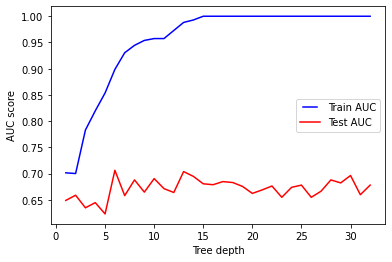

0.8301572897761644
15


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, auc, roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Get the average of the list
def Average(lst):
    return sum(lst) / len(lst)

# Get the train/test split
pred_train, pred_test, tar_train, tar_test = train_test_split(X, Y, test_size=.3, random_state=4)

## Feature Importance with Extra Trees Classifier
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(pred_train, tar_train)
   train_pred = dt.predict(pred_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(tar_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(pred_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(tar_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
   print(max_depth, accuracy_score(tar_test, y_pred))
    
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

# Optimun for avoiding over/underfitting but keeping below 15 nodes is 3
dt = DecisionTreeClassifier(max_depth=3)
kf = KFold(n_splits=10)
dt.fit(pred_train, tar_train)
print(Average(cross_val_score(dt, pred_train, tar_train, cv=kf, scoring='accuracy')))
print(dt.tree_.node_count)

0.1 0.8081632653061225
0.2 0.8244897959183674
0.30000000000000004 0.8285714285714286
0.4 0.8285714285714286
0.5 0.8285714285714286
0.6 0.8285714285714286
0.7000000000000001 0.8285714285714286
0.8 0.8285714285714286
0.9 0.8285714285714286
1.0 0.8285714285714286


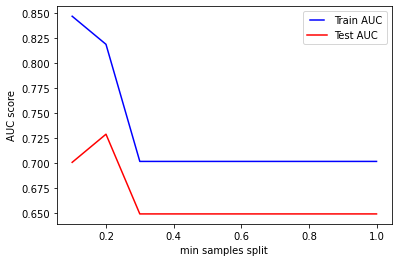

0.8196612220205687
13


In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_splits
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(pred_train, tar_train)
   train_pred = dt.predict(pred_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(tar_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(pred_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(tar_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
   print(min_samples_split, accuracy_score(tar_test, y_pred))
    
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

# Optimun for avoiding over/underfitting but keeping below 15 nodes is 0.3 
dt = DecisionTreeClassifier(min_samples_split=0.3)
kf = KFold(n_splits=10)
dt.fit(pred_train, tar_train)
print(Average(cross_val_score(dt, pred_train, tar_train, cv=kf, scoring='accuracy')))
print(dt.tree_.node_count)

1 0.7551020408163265
2 0.8122448979591836
3 0.7795918367346939
4 0.8285714285714286
5 0.7591836734693878
6 0.7918367346938775
7 0.8204081632653061
8 0.7591836734693878
9 0.8285714285714286
10 0.7918367346938775
11 0.7673469387755102
12 0.7918367346938775
13 0.8081632653061225
14 0.8285714285714286
15 0.8122448979591836


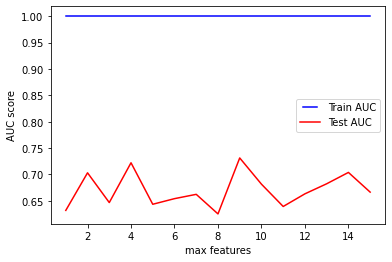

0.7810647307924985
151


In [ ]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(pred_train, tar_train)
   train_pred = dt.predict(pred_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(tar_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(pred_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(tar_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
   print(max_feature, accuracy_score(tar_test, y_pred))
    
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

# Unable be stay nnder 15 nodes by a long sot, but the more features the less nodes
dt = DecisionTreeClassifier(max_features=16)
kf = KFold(n_splits=10)
dt.fit(pred_train, tar_train)
print(Average(cross_val_score(dt, pred_train, tar_train, cv=kf, scoring='accuracy')))
print(dt.tree_.node_count)

0.1 0.8285714285714286
0.2 0.8040816326530612
0.30000000000000004 0.8244897959183674
0.4 0.8244897959183674
0.5 0.8244897959183674


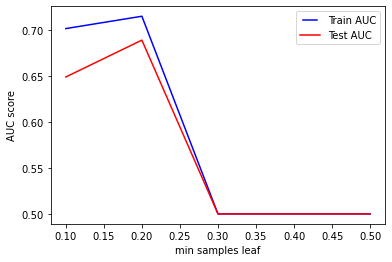

0.7827888687235329
7


In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(pred_train, tar_train)
   train_pred = dt.predict(pred_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(tar_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(pred_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(tar_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
   print(min_samples_leaf, accuracy_score(tar_test, y_pred))
    
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

# Optimun for avoiding over/underfitting but keeping below 15 nodes is 0.2
dt = DecisionTreeClassifier(min_samples_leaf=0.2)
kf = KFold(n_splits=10)
dt.fit(pred_train, tar_train)
print(Average(cross_val_score(dt, pred_train, tar_train, cv=kf, scoring='accuracy')))
print(dt.tree_.node_count)

# Describe the role of the two parameters

## min_samples_split (int or float, default=2)

The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

Changed in version 0.18: Added float values for fractions.

## min_samples_leaf (int or float, default=1)

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

If int, then consider min_samples_leaf as the minimum number.

If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Changed in version 0.18: Added float values for fractions.

## Will the same apply for other dataset?

Depends on the type of dataset, how


# Confusion Matrix

0.7827888687235329
7
Confusion matrix, without normalization
[[175  27]
 [ 21  22]]
Normalized confusion matrix
[[0.866 0.134]
 [0.488 0.512]]


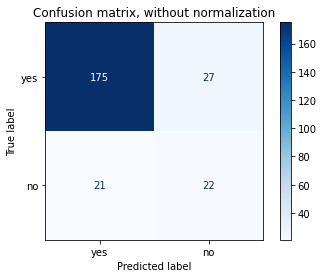

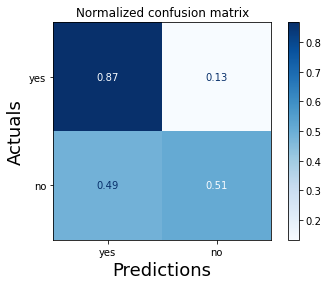

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# Get the train/test split
pred_train, pred_test, tar_train, tar_test = train_test_split(X, Y, test_size=.3, random_state=4)

dt = DecisionTreeClassifier(min_samples_leaf=0.2, min_samples_split=0.3)
kf = KFold(n_splits=10)
dt.fit(pred_train, tar_train)
train_pred = dt.predict(pred_train)
print(Average(cross_val_score(dt, pred_train, tar_train, cv=kf, scoring='accuracy')))
print(dt.tree_.node_count)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt, pred_test, tar_test,
                                 display_labels=['yes','no'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()